<a href="https://colab.research.google.com/github/AlmaRosa13/Ecuaciones_Diferenciales/blob/main/EcuacionesDiferenciales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sympy as sp

# Definir las variables
x, y, C = sp.symbols('x y C')

# Definir la ecuación diferencial
dy_dx = sp.Function('y')(x).diff(x)  # dy/dx
f = 2*y

# Separar las variables y reescribir la ecuación
# dy/dx = 2*y   =>   dy/y = 2*dx

# Separar las variables
lhs = sp.integrate(1 / y, y)
rhs = sp.integrate(2*x, x)

# Obtener la solución general
general_solution = lhs - rhs + sp.symbols('C')
general_solution_simplified = sp.simplify(general_solution)

print(f"Solución general: {general_solution_simplified}")

# Instead of solving for y(x), try solving for y
solution = sp.solve(general_solution_simplified, y)

# Check if a solution was found and print it accordingly
if solution:
    print(f"Solución general en términos de y: {solution[0]}")
else:
    print("No se encontró una solución en términos de y.")

Solución general: C - x**2 + log(y)
Solución general en términos de y: exp(-C + x**2)


In [ ]:
import sympy as sp

# Definir las variables simbólicas
x, y = sp.symbols('x y')
C = sp.symbols('C')

# Definir la ecuación diferencial
dydx = 3 * y**(2/3)

# Separar las variables
lhs = sp.integrate(1 / (y**(2/3)), y)
rhs = sp.integrate(3, x)

# Añadir la constante de integración y resolver
general_solution = sp.Eq(lhs, rhs + C)
general_solution_simplified = sp.simplify(general_solution)

# Aplicar la condición inicial y resolver para la constante de integración
y_initial = 0
x_initial = 1

# Resolver para C usando la condición inicial
condition = general_solution_simplified.subs({x: x_initial, y: y_initial})
C_value = sp.solve(condition, C)[0]

# Sustituir la constante de integración en la solución general
particular_solution = general_solution_simplified.subs(C, C_value)
particular_solution_simplified = sp.simplify(particular_solution)

print(f"Solución general: {general_solution_simplified}")
print(f"Constante de integración (C): {C_value}")
print(f"Solución particular: {particular_solution_simplified}")

# Para visualizar la solución, expresarla en términos de y
y_solution = sp.solve(particular_solution_simplified, y)
print(f"Solución particular en términos de y: {y_solution[0]}")

Solución general: Eq(3.0*y**0.333333333333333, C + 3*x)
Constante de integración (C): -3
Solución particular: Eq(3.0*y**0.333333333333333, 3*x - 3)
Solución particular en términos de y: (x - 1.0)**3


In [ ]:
import sympy as sp

# Definir la variable
x = sp.symbols('x')
C = sp.symbols('C')

# Definir la solución general
y = 3 / (x + C)

# Calcular la derivada
dy_dx = sp.diff(y, x)

# Simplificar la expresión de la derivada
dy_dx_simplified = sp.simplify(dy_dx)

# Imprimir la derivada
print(f"Derivada: {dy_dx_simplified}")

# Verificar la ecuación diferencial original
# Se espera que esta expresión sea igual a 3*y**(2/3)
equation_diff = dy_dx_simplified - 3 * y**(2/3)
print(f"Ecuación diferencial: {equation_diff}")


Derivada: -3/(C + x)**2
Ecuación diferencial: -6.24025146915571*(1/(C + x))**0.666666666666667 - 3/(C + x)**2


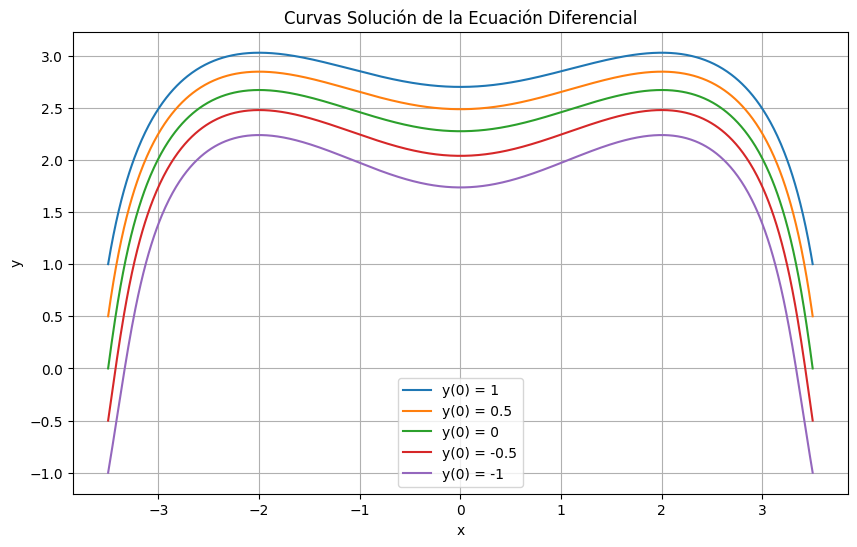

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definir la función que representa la ecuación diferencial
def differential_equation(y, x):
    return (4*x - x**3) / (4 + y**2)

# Definir el rango de valores para x
x_vals = np.linspace(-3.5, 3.5, 800)

# Condiciones iniciales
initial_conditions = [1, 0.5, 0, -0.5, -1]

# Graficar las curvas solución
plt.figure(figsize=(10, 6))

for y0 in initial_conditions:
    # Resolver la ecuación diferencial numéricamente
    y_vals = odeint(differential_equation, y0, x_vals)

    # Graficar la solución
    plt.plot(x_vals, y_vals, label=f'y(0) = {y0}')

# Etiquetas y título
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curvas Solución de la Ecuación Diferencial')
plt.legend()
plt.grid(True)
plt.show()


Solución general: Eq(y(x), C1*exp(3*x) - 2)


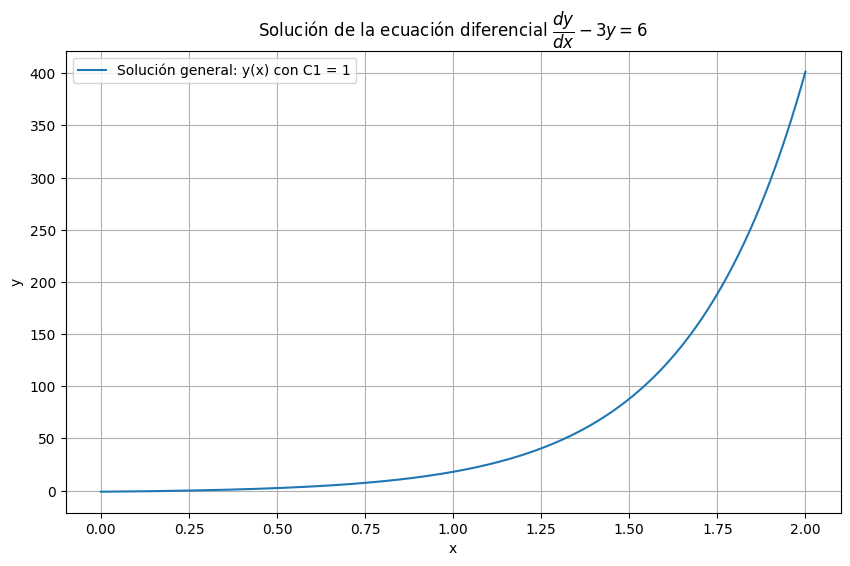

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definir las variables simbólicas
x = sp.symbols('x')
C1 = sp.symbols('C1')  # Definir la constante de integración
y = sp.Function('y')(x)

# Definir la ecuación diferencial
differential_eq = sp.Eq(sp.Derivative(y, x) - 3*y, 6)

# Resolver la ecuación diferencial
solution = sp.dsolve(differential_eq, y)
print(f"Solución general: {solution}")

# Extraer la parte de la solución que no incluye la constante
y_solution = solution.rhs

# Convertir la solución a una función numérica para la gráfica
y_func = sp.lambdify(x, y_solution.subs(C1, 1), 'numpy')  # Suponiendo C1 = 1 para la gráfica

# Definir un rango de valores para x
x_vals = np.linspace(0, 2, 400)
y_vals = y_func(x_vals)

# Graficar la solución
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='Solución general: y(x) con C1 = 1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solución de la ecuación diferencial $\dfrac{dy}{dx} - 3y = 6$')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import sympy as sp

# Definir las variables simbólicas
x, y = sp.symbols('x y')

# Definir las funciones M(x, y) y N(x, y)
M = 2*x*y
N = 1 + x**2

# Verificar si la ecuación es exacta
M_x = sp.diff(M, x)  # Derivada parcial de M con respecto a x
N_y = sp.diff(N, y)  # Derivada parcial de N con respecto a y

# Comprobar la condición de exactitud
is_exact = sp.simplify(M_x - N_y) == 0
print(f"La ecuación es exacta: {is_exact}")

if is_exact:
    # Integrar M(x, y) con respecto a x para encontrar la función f(x, y)
    f_x = sp.integrate(M, x)

    # Obtener la función arbitraria de y
    f_y = sp.Function('F')(y)

    # Derivar f(x, y) con respecto a y
    f_y_expr = sp.diff(f_x + f_y, y)

    # Ajustar la función arbitraria para que coincida con N(x, y)
    g_y = sp.integrate(N - f_y_expr, y)

    # La función f(x, y) es
    f = f_x + g_y
    print(f"La función f(x, y) es: {f}")

    # Mostrar la solución implícita
    solution = sp.Eq(f, sp.Symbol('C'))
    print(f"Solución implícita: {solution}")

    # Simplificar la solución
    simplified_solution = sp.simplify(solution)
    print(f"Solución simplificada: {simplified_solution}")
else:
    print("La ecuación no es exacta y no se puede resolver de esta manera.")


La ecuación es exacta: False
La ecuación no es exacta y no se puede resolver de esta manera.


In [ ]:
import sympy as sp
import numpy as np

# Definir las variables simbólicas
x, y = sp.symbols('x y')

# Definir las funciones M(x, y) y N(x, y)
M = sp.exp(2*y)- y*sp.cos(x*y)  # Use SymPy's exp function
N = 2*x*sp.exp(2*y)-x*sp.cos(x*y)+2*y # Use SymPy's exp function

# Verificar si la ecuación es exacta
M_x = sp.diff(M, x)  # Derivada parcial de M con respecto a x
N_y = sp.diff(N, y)  # Derivada parcial de N con respecto a y

# Comprobar la condición de exactitud
is_exact = sp.simplify(M_x - N_y) == 0
print(f"La ecuación es exacta: {is_exact}")

if is_exact:
    # Integrar M(x, y) con respecto a x para encontrar la función f(x, y)
    f_x = sp.integrate(M, x)

    # Obtener la función arbitraria de y
    f_y = sp.Function('F')(y)

    # Derivar f(x, y) con respecto a y
    f_y_expr = sp.diff(f_x + f_y, y)

    # Ajustar la función arbitraria para que coincida con N(x, y)
    g_y = sp.integrate(N - f_y_expr, y)

    # La función f(x, y) es
    f = f_x + g_y
    print(f"La función f(x, y) es: {f}")

    # Mostrar la solución implícita
    solution = sp.Eq(f, sp.Symbol('C'))
    print(f"Solución implícita: {solution}")

    # Simplificar la solución
    simplified_solution = sp.simplify(solution)
    print(f"Solución simplificada: {simplified_solution}")
else:
    print("La ecuación no es exacta y no se puede resolver de esta manera.")

La ecuación es exacta: False
La ecuación no es exacta y no se puede resolver de esta manera.


In [ ]:
import sympy as sp
import numpy as np

# Definir las variables simbólicas
x, y = sp.symbols('x y')

# Definir las funciones M(x, y) y N(x, y)
M = sp.exp(2*y)- y*sp.cos(x*y)  # Use SymPy's exp function
N = 2*x*sp.exp(2*y)-x*sp.cos(x*y)+2*y # Use SymPy's exp function

# Verificar si la ecuación es exacta
M_x = sp.diff(M, x)  # Derivada parcial de M con respecto a x
N_y = sp.diff(N, y)  # Derivada parcial de N con respecto a y

# Comprobar la condición de exactitud
is_exact = sp.simplify(M_x - N_y) == 0
print(f"La ecuación es exacta: {is_exact}")

if is_exact:
    # Integrar M(x, y) con respecto a x para encontrar la función f(x, y)
    f_x = sp.integrate(M, x)

    # Obtener la función arbitraria de y
    f_y = sp.Function('F')(y)

    # Derivar f(x, y) con respecto a y
    f_y_expr = sp.diff(f_x + f_y, y)

    # Ajustar la función arbitraria para que coincida con N(x, y)
    g_y = sp.integrate(N - f_y_expr, y)

    # La función f(x, y) es
    f = f_x + g_y
    print(f"La función f(x, y) es: {f}")

    # Mostrar la solución implícita
    solution = sp.Eq(f, sp.Symbol('C'))
    print(f"Solución implícita: {solution}")

    # Simplificar la solución
    simplified_solution = sp.simplify(solution)
    print(f"Solución simplificada: {simplified_solution}")
else:
    print("La ecuación no es exacta y no se puede resolver de esta manera.")

La ecuación es exacta: False
La ecuación no es exacta y no se puede resolver de esta manera.


In [ ]:
import sympy as sp

# Definir las variables simbólicas
x, y = sp.symbols('x y')

# Definir las funciones M(x, y) y N(x, y)
M = 2*x + y
N = x + 2*y

# Verificar si la ecuación es exacta
M_x = sp.diff(M, x)  # Derivada parcial de M con respecto a x
N_y = sp.diff(N, y)  # Derivada parcial de N con respecto a y

# Comprobar la condición de exactitud
is_exact = sp.simplify(M_x - N_y) == 0
print(f"La ecuación es exacta: {is_exact}")

if is_exact:
    # Integrar M(x, y) con respecto a x para encontrar la función f(x, y)
    f_x = sp.integrate(M, x)

    # Obtener la función arbitraria de y
    f_y = sp.Function('F')(y)

    # Derivar f(x, y) con respecto a y
    f_y_expr = sp.diff(f_x + f_y, y)

    # Ajustar la función arbitraria para que coincida con N(x, y)
    g_y = sp.integrate(N - f_y_expr, y)

    # La función f(x, y) es
    f = f_x + g_y
    print(f"La función f(x, y) es: {f}")

    # Mostrar la solución implícita
    solution = sp.Eq(f, sp.Symbol('C'))
    print(f"Solución implícita: {solution}")

    # Simplificar la solución
    simplified_solution = sp.simplify(solution)
    print(f"Solución simplificada: {simplified_solution}")
else:
    print("La ecuación no es exacta y no se puede resolver de esta manera.")

La ecuación es exacta: True
La función f(x, y) es: x**2 + x*y + y**2 - F(y)
Solución implícita: Eq(x**2 + x*y + y**2 - F(y), C)
Solución simplificada: Eq(C, x**2 + x*y + y**2 - F(y))


In [ ]:
import sympy as sp

# Definir las variables simbólicas
x, y = sp.symbols('x y')

# Definir las funciones M(x, y) y N(x, y)
M = 1/(x*y**2-sp.cos(x)*sp.sin(x))
N = y*(1+x**2)

# Verificar si la ecuación es exacta
M_x = sp.diff(M, x)  # Derivada parcial de M con respecto a x
N_y = sp.diff(N, y)  # Derivada parcial de N con respecto a y

# Comprobar la condición de exactitud
is_exact = sp.simplify(M_x - N_y) == 0
print(f"La ecuación es exacta: {is_exact}")

if is_exact:
    # Integrar M(x, y) con respecto a x para encontrar la función f(x, y)
    f_x = sp.integrate(M, x)

    # Obtener la función arbitraria de y
    f_y = sp.Function('F')(y)

    # Derivar f(x, y) con respecto a y
    f_y_expr = sp.diff(f_x + f_y, y)

    # Ajustar la función arbitraria para que coincida con N(x, y)
    g_y = sp.integrate(N - f_y_expr, y)

    # La función f(x, y) es
    f = f_x + g_y
    print(f"La función f(x, y) es: {f}")

    # Mostrar la solución implícita
    solution = sp.Eq(f, sp.Symbol('C'))
    print(f"Solución implícita: {solution}")

    # Simplificar la solución
    simplified_solution = sp.simplify(solution)
    print(f"Solución simplificada: {simplified_solution}")
else:
    print("La ecuación no es exacta y no se puede resolver de esta manera.")

La ecuación es exacta: False
La ecuación no es exacta y no se puede resolver de esta manera.


In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definir las variables simbólicas
x, y = sp.symbols('x y')
C = sp.symbols('C')  # Constante de integración

# Definir M(x, y) y N(x, y) para la ecuación diferencial exacta
M = 1/(x*y**2-sp.cos(x)*sp.sin(x))
N = y*(1+x**2)

# Verificar que la ecuación es exacta
M_y = sp.diff(M, y)
N_x = sp.diff(N, x)

if M_y == N_x:
    print("La ecuación es exacta.")
else:
    print("La ecuación no es exacta.")

# Encontrar la función f(x, y)
# Integrar M(x, y) con respecto a x
f_x = sp.integrate(M, x)
f_x = sp.simplify(f_x)

# Obtener la función f(x, y) completa
# Integrar la derivada parcial de f(x, y) con respecto a y y resolver para C
f_y = sp.integrate(N - sp.diff(f_x, y), y)
f_y = sp.simplify(f_y)
f = f_x + f_y

# Mostrar la función implícita
print(f"Función implícita: {f} = C")

# Aplicar la condición inicial y determinar C
condition = sp.Eq(f, C).subs({x: 0, y: 2})
C_value = sp.solve(condition, C)
if C_value:
    C_value = C_value[0]
    f_solution = f.subs(C, C_value)
    print(f"Valor de C: {C_value}") # Print the value of C
else:
    raise ValueError("No se encontró un valor válido para C.")

# Convertir la función a una forma que podamos graficar
x_vals = np.linspace(-2, 2, 400)
y_vals = np.zeros_like(x_vals)

# Check if solutions exist before attempting to lambdify
solutions = sp.solve(f_solution.subs(C, 0), y)
if solutions:
    # Definir la función para graficar
    y_func = sp.lambdify(x, solutions[0], 'numpy')

    # Evaluar la función en el intervalo x
    y_vals = y_func(x_vals)

    # Graficar la solución
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label='Solución con C = {}'.format(C_value))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Solución de la ecuación diferencial exacta con condición inicial')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No se encontraron soluciones para y después de sustituir C con 0.")

La ecuación no es exacta.
Función implícita: Integral(y*(x**2 + 8*Integral(x/(4*x**2*y**4 - 4*x*y**2*sin(2*x) + sin(2*x)**2), x) + 1), y) + Integral(1/(x*y**2 - sin(2*x)/2), x) = C
Valor de C: Integral(y*(8*Integral(x/(4*x**2*y**4 - 4*x*y**2*sin(2*x) + sin(2*x)**2), (x, 0)) + 1), (y, 2)) + 2*Integral(1/(8*x - sin(2*x)), (x, 0))
No se encontraron soluciones para y después de sustituir C con 0.


La ecuación es exacta.
Función implícita: x**2*(8 - x**2)/4 + y*(y**2 + 12)/3 = C
Valor de C: 13/3


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


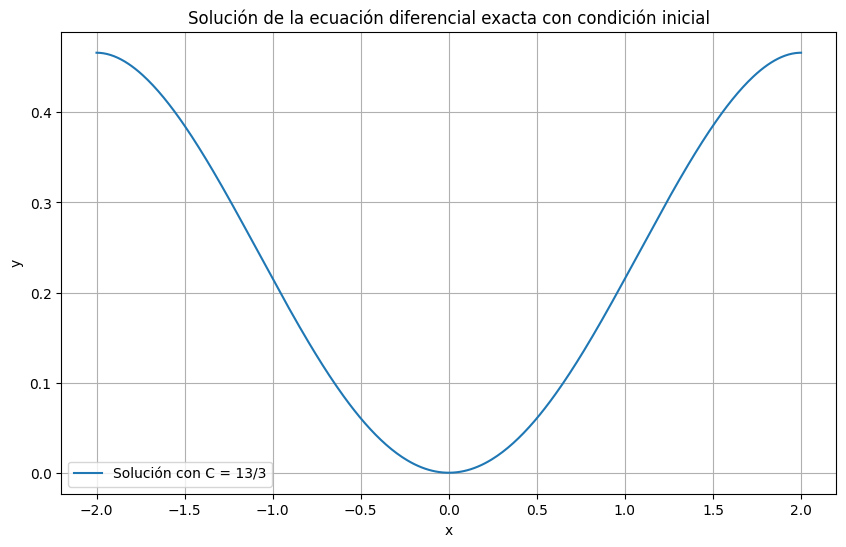

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definir las variables simbólicas
x, y = sp.symbols('x y')
C = sp.symbols('C')  # Constante de integración

# Definir M(x, y) y N(x, y) para la ecuación diferencial exacta
M = 4*x - x**3
N = 4 + y**2

# Verificar que la ecuación es exacta
M_y = sp.diff(M, y)
N_x = sp.diff(N, x)

if M_y == N_x:
    print("La ecuación es exacta.")
else:
    print("La ecuación no es exacta.")

# Encontrar la función f(x, y)
# Integrar M(x, y) con respecto a x
f_x = sp.integrate(M, x)
f_x = sp.simplify(f_x)

# Obtener la función f(x, y) completa
# Integrar la derivada parcial de f(x, y) con respecto a y y resolver para C
f_y = sp.integrate(N - sp.diff(f_x, y), y)
f_y = sp.simplify(f_y)
f = f_x + f_y

# Mostrar la función implícita
print(f"Función implícita: {f} = C")

# Aplicar la condición inicial y determinar C
# The original code used f.subs({x: 0, y: 1}) which evaluates to a constant, not an equation
# Instead, create an equation setting f equal to C and substitute the initial condition
condition = sp.Eq(f, C).subs({x: 0, y: 1})
C_value = sp.solve(condition, C)
if C_value:
    C_value = C_value[0]
    f_solution = f.subs(C, C_value)
    print(f"Valor de C: {C_value}") # Print the value of C
else:
    raise ValueError("No se encontró un valor válido para C.")

# Convertir la función a una forma que podamos graficar
x_vals = np.linspace(-2, 2, 400)
y_vals = np.zeros_like(x_vals)

# Definir la función para graficar
y_func = sp.lambdify(x, sp.solve(f_solution.subs(C, 0), y)[0], 'numpy')

# Evaluar la función en el intervalo x
y_vals = y_func(x_vals)

# Graficar la solución
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='Solución con C = {}'.format(C_value))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solución de la ecuación diferencial exacta con condición inicial')
plt.legend()
plt.grid(True)
plt.show()